# Netflix Movies and TV Shows - EDA 

In [1]:
import numpy as np
import pandas as pd

In [2]:
netflix = pd.read_csv('netflix.csv')

In [3]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Number of unique values per feature

In [5]:
netflix.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

### Missing values

In [6]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

### Visualiaziton of missing values

In [7]:
import missingno as msno

<AxesSubplot:>

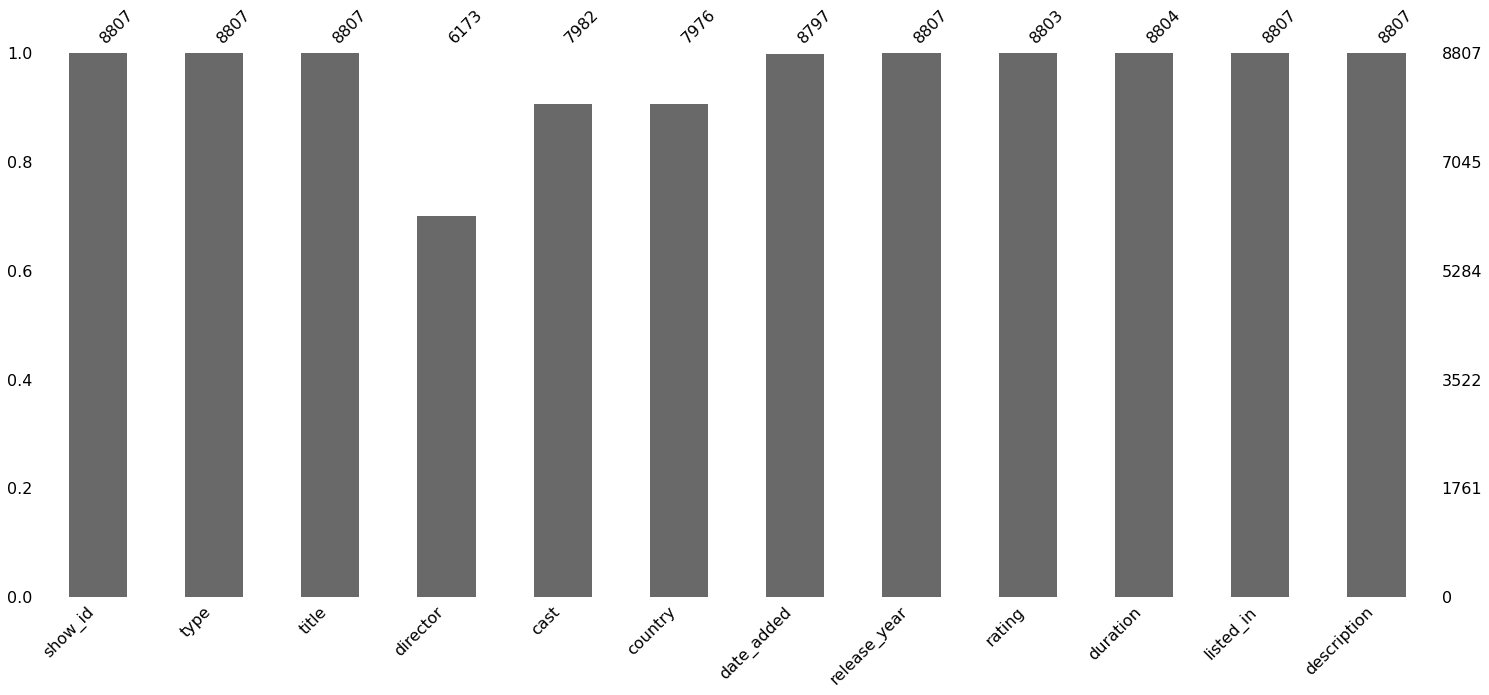

In [8]:
msno.bar(netflix)

(8807, 12)


<AxesSubplot:>

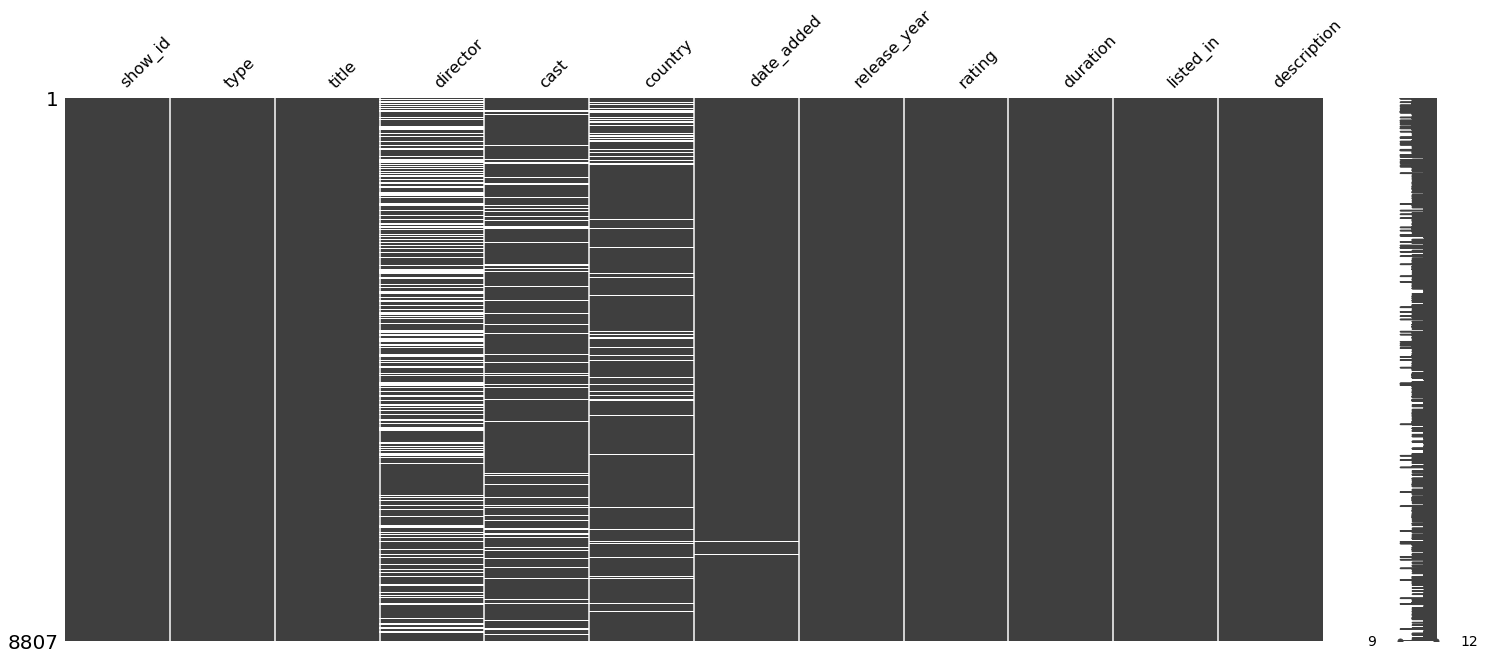

In [9]:
print(netflix.shape)
msno.matrix(netflix)

<AxesSubplot:>

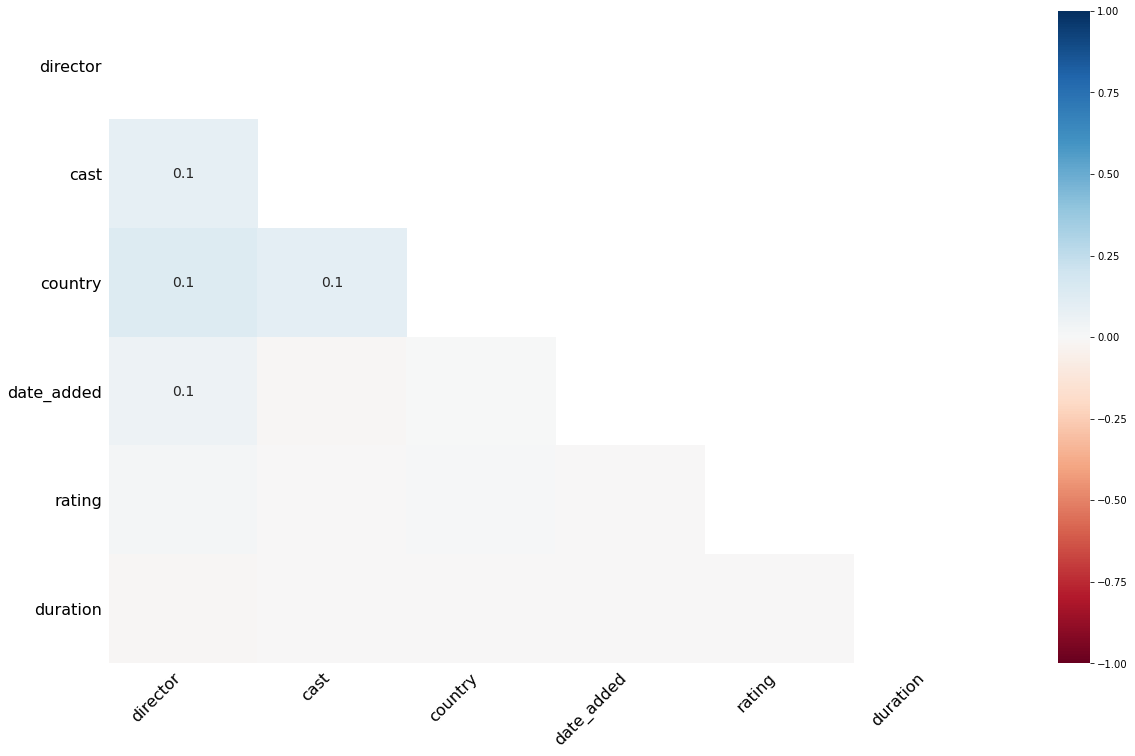

In [10]:
msno.heatmap(netflix)

There is no correlation btw missing values.

### Dealing with missing values 

'director' feature has 2634 missing values and has 4528 unique values. 'cast' feature has 825 missing values and has 7692 unique values. 

There is no point of predicting these values or imputing mode since there are too many unique values. All missing values will be imputed by 'Unknown'.

In [11]:
netflix['director'] = netflix['director'].fillna('Unknown')
netflix['cast'] = netflix['cast'].fillna('Unknown')

'country' has 831 missing values and has 748 unique values. However, frequency of each value will be checked.

In [12]:
netflix['country'].value_counts()

United States                                    2818
India                                             972
United Kingdom                                    419
Japan                                             245
South Korea                                       199
                                                 ... 
Canada, Germany, France, United States              1
Lebanon, France                                     1
Canada, Belgium                                     1
United States, France, Canada, Lebanon, Qatar       1
Chile, Spain, Argentina, Germany                    1
Name: country, Length: 748, dtype: int64

'United States' is most frequent value by far. In other words, mode of 'country' is 'United States'. Therefore, all missing values will be filled in with the mode.

In [13]:
netflix['country'] = netflix['country'].fillna(netflix['country'].mode()[0])

'date_added' has 10 missing values and 1767 unique values. Since it has low number of missing values and too many unique values, best option is to drop rows/observations where are missing values

In [14]:
netflix = netflix.drop(netflix[netflix['date_added'].isna() == True].index)

'rating' has only 4 missing values and best option is drop those rows. Same thing with 'duration'.

In [15]:
netflix = netflix.drop(netflix[netflix['rating'].isna() == True].index)
netflix = netflix.drop(netflix[netflix['duration'].isna() == True].index)

Checking are there any left missing values

In [16]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

#### Handling 'date_added'

In [17]:
netflix['date_added']

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8790, dtype: object

Month and year will be extracted to be able to use it for visualisation.

In [18]:
netflix['month'] = netflix['date_added'].apply(lambda x: x.split(" ")[0])
netflix['year'] = netflix['date_added'].apply(lambda x: x.split(" ")[-1])

### Handling 'listed_in'

In [19]:
netflix['listed_in']

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8790, dtype: object

Since one TV Show or movie may have different genres, it is not suitabale to compare all genres of one movie to all genres of other movie, so we will keep only the first one that is most accurate.

In [20]:
netflix['listed_in'] = netflix['listed_in'].apply(lambda x: x.split(",")[0])

### Handling 'rating'

In [21]:
netflix['rating'].value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

All these types of ratings are not that clear, so we will tranform it by using dictionaries or mapping each value of 'rating' to other more understandable value.

In [22]:
ratings_dict = {
    'TV-PG': 'Older Kids', #TV - Parental Guidance
    'TV-MA': 'Adults', #TV - Mature
    'TV-Y7-FV': 'Older Kids', #TV - age 7 and above - Fantasy Violence
    'TV-Y7': 'Older Kids', #TV - age 7 and above
    'TV-14': 'Teens', #TV - age 14 and above
    'R': 'Adults', #Restricted - Under 17 requires accompanying parent or adult guardian
    'TV-Y': 'Kids', #TV - appropriate for all children
    'NR': 'Adults', #Not rated
    'PG-13': 'Teens',#Parents Strongly Cautioned
    'TV-G': 'Kids', #Most parents will find this program suitable for all ages
    'PG': 'Older Kids', #This program contains material that parents may find unsuitable for younger children.
    'G': 'Kids', #General Audiences - All aged admited
    'UR': 'Adults', #Unrated
    'NC-17': 'Adults' #Adults Only - No One 17 and Under Admitted
}

In [23]:
netflix['recommended_for'] = netflix['rating'].replace(ratings_dict, inplace = True)

In [24]:
netflix['recommended_for'].value_counts()

Series([], Name: recommended_for, dtype: int64)

### Handling 'country'

In [25]:
netflix['country'].value_counts()

United States                                    3638
India                                             972
United Kingdom                                    418
Japan                                             243
South Korea                                       199
                                                 ... 
Canada, Germany, France, United States              1
Lebanon, France                                     1
Canada, Belgium                                     1
United States, France, Canada, Lebanon, Qatar       1
Chile, Spain, Argentina, Germany                    1
Name: country, Length: 748, dtype: int64

Since there are many movies/tv shows that have plot in more than one country, to make it easier we will extract first country as main country.

In [26]:
netflix['main_country'] = netflix['country'].apply(lambda x: x.split(",")[0])

# Visualiazation 

In [27]:
import plotly.express as px
import seaborn as sns

In [28]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

### What type of content is more uploaded on Netflix?

In [29]:
netflix['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [30]:
content = netflix['type'].value_counts().sort_values(ascending = False).reset_index()
content

,index,type
0,Movie,6126
1,TV Show,2664


In [86]:
fig = px.pie(content, values = 'type', names = 'index', 
             color_discrete_map= 'identity',
             labels = {'index': 'type', 'type': 'Count'},
             title = 'What type of content is more uploaded on Netflix?')
fig.show()

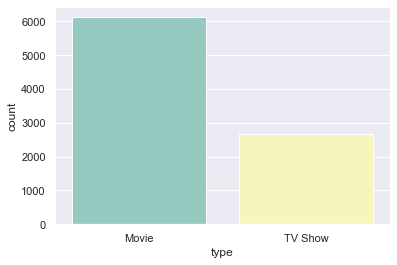

In [32]:
#vertically
import seaborn as sns
sns.set_theme(style = 'darkgrid')

ax = sns.countplot(x = 'type', data = netflix, palette="Set3")

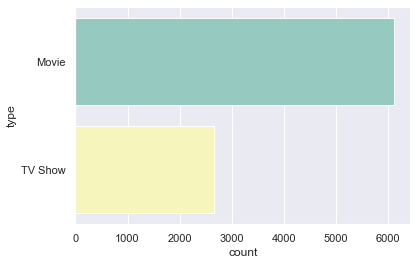

In [33]:
#horizonzally
import seaborn as sns
sns.set_theme(style = 'darkgrid')

ax = sns.countplot(y = 'type', data = netflix, palette="Set3")

### Top 10 countries with Netflix Content

In case abbriation of countries are used, we will replace them.

In [34]:
netflix['main_country'].replace('USA', 'United States', inplace=True)
netflix['main_country'].replace('UK', 'United Kingdom', inplace=True)
netflix['main_country'].replace('S. Korea', 'South Korea', inplace=True)

In [35]:
netflix['country'].value_counts()[:10]

United States     3638
India              972
United Kingdom     418
Japan              243
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

In [36]:
countries = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 
             'South Corea', 'Spain', 'Mexico', 'Australia', 'Egypt']

In [37]:
netflix['Top 10'] = netflix['main_country'].apply(lambda x: True if x in countries else False)

In [38]:
netflix_top_10 = netflix[netflix['Top 10'] == True]

<AxesSubplot:xlabel='main_country', ylabel='count'>

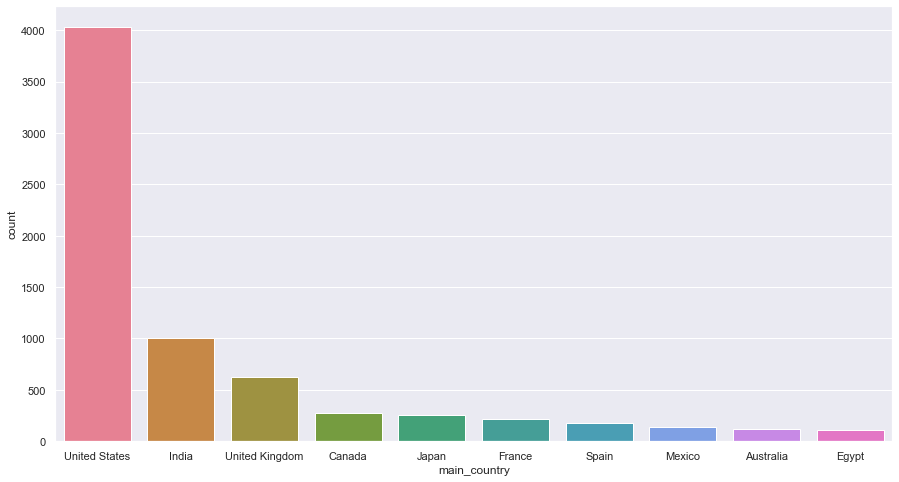

In [39]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.countplot(x = 'main_country', 
              data = netflix_top_10, 
              palette = 'husl',
              order = netflix_top_10['main_country'].value_counts().index)

<AxesSubplot:xlabel='main_country', ylabel='count'>

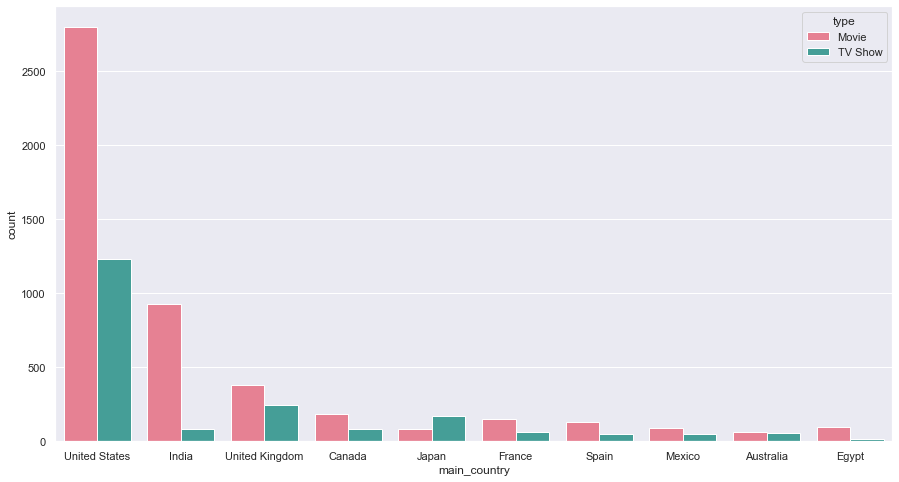

In [40]:
sns.countplot(x = "main_country", hue = "type", data = netflix_top_10, palette = "husl", order = netflix_top_10['main_country'].value_counts().index)

### The target category of the Netflix in general 

In [41]:
netflix['rating'].value_counts()

Adults        4089
Teens         2647
Older Kids    1487
Kids           567
Name: rating, dtype: int64

<AxesSubplot:xlabel='rating', ylabel='count'>

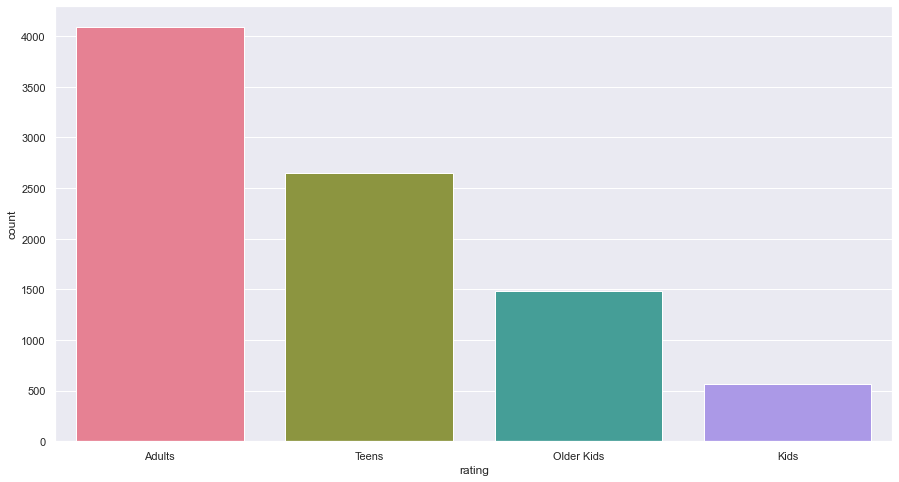

In [42]:
sns.countplot(x = 'rating', 
              data = netflix, 
              palette = 'husl',
              order = netflix_top_10['rating'].value_counts().index)

### The target category of the Netflix for both Movie and TV Show

<AxesSubplot:xlabel='rating', ylabel='count'>

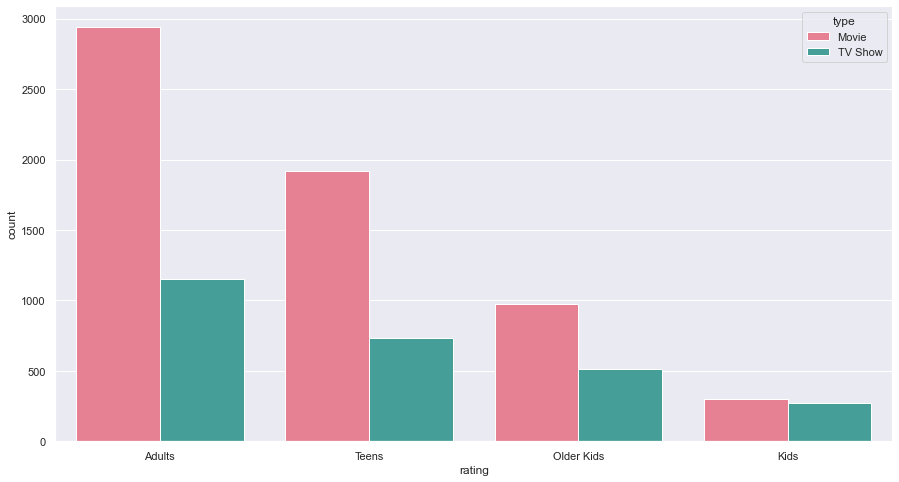

In [43]:
sns.countplot(x = 'rating', 
              data = netflix, 
              palette = 'husl',
              hue = 'type',
              order = netflix_top_10['rating'].value_counts().index)

### Overall content release trend

<AxesSubplot:>

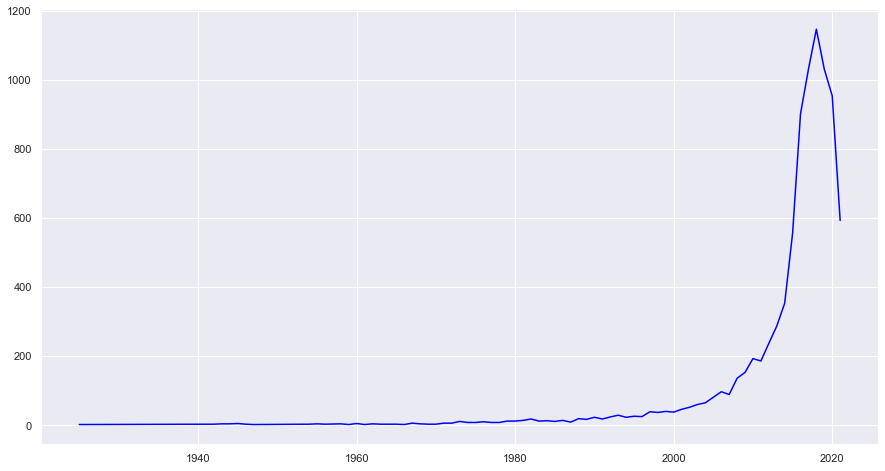

In [44]:
release_year = netflix['release_year'].value_counts()

sns.lineplot(x = release_year.index, y = release_year.values, color = 'Blue')

In [45]:
release_year_last_15 = netflix['release_year'].value_counts()[:15]

<AxesSubplot:>

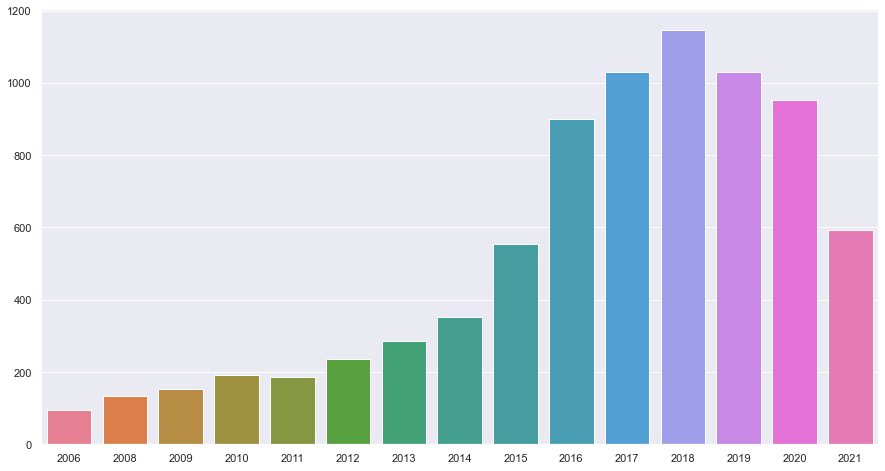

In [46]:
sns.barplot(x = release_year_last_15.index, y = release_year_last_15.values, palette = 'husl')

### Overall content release trend on Netflix

In [47]:
year_added_netflix = netflix['year'].value_counts()

In [48]:
year_added_netflix = year_added_netflix.sort_index()

<AxesSubplot:>

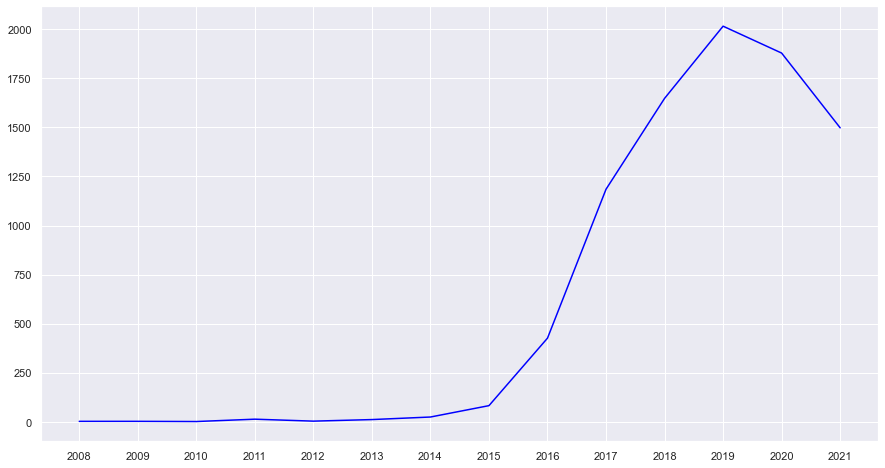

In [49]:
sns.lineplot(x = year_added_netflix.index, y = year_added_netflix.values, color = 'Blue')

<AxesSubplot:>

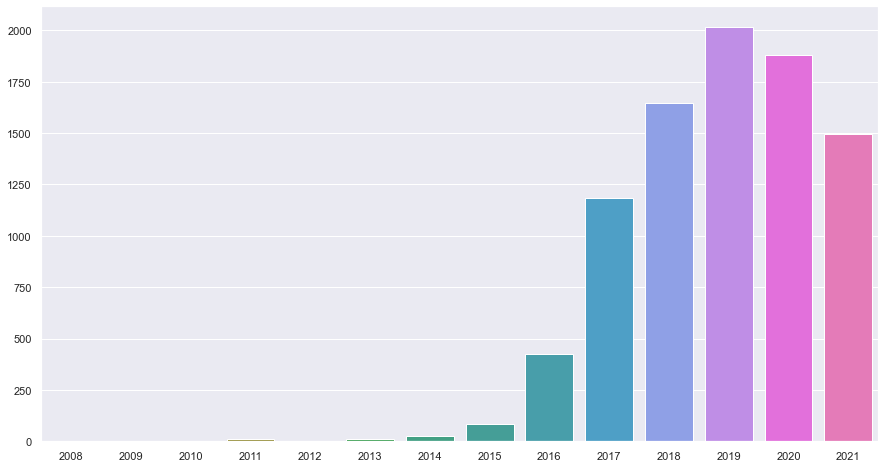

In [50]:
sns.barplot(x = year_added_netflix.index, 
            y = year_added_netflix.values, 
            palette = 'husl')

### Movie Duration

In [51]:
netflix['Movie'] = netflix['type'].apply(lambda x: True if (x == 'Movie') else False)

In [52]:
netflix_movies = netflix[netflix['Movie'] == True]

In [53]:
netflix_movies['duration'].value_counts()

90 min     152
94 min     146
93 min     146
97 min     146
91 min     144
          ... 
178 min      1
237 min      1
191 min      1
193 min      1
230 min      1
Name: duration, Length: 205, dtype: int64

In [54]:
netflix_movies['duration'] = netflix_movies['duration'].apply(lambda x: x.split(" ")[0]).astype(int)

<ipython-input-54-12e64fca03ae>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='duration', ylabel='Count'>

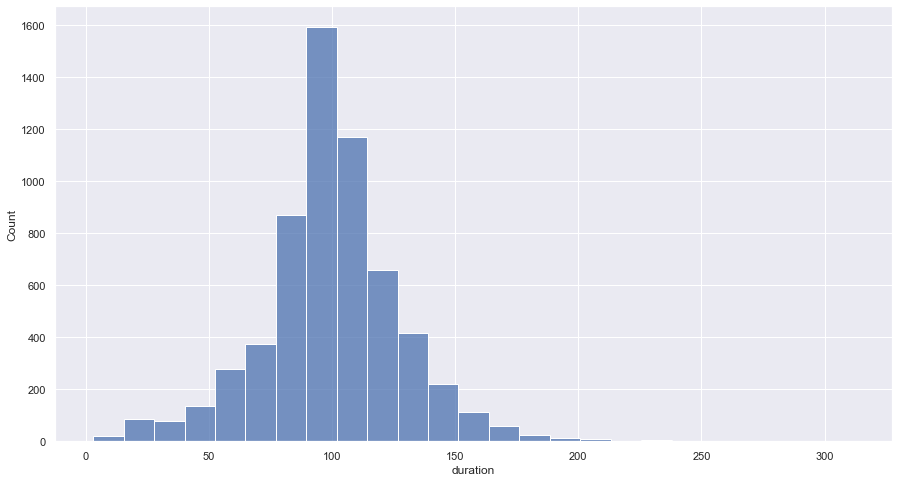

In [55]:
sns.histplot(data = netflix_movies, x = 'duration', bins = 25, palette = 'husl')

<AxesSubplot:xlabel='duration', ylabel='Count'>

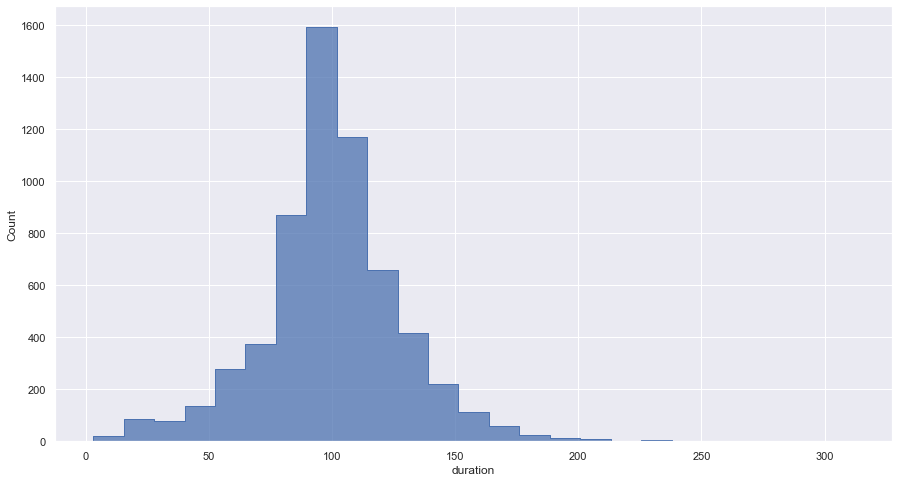

In [56]:
sns.histplot(data = netflix_movies, x = 'duration', element = 'step', bins = 25)

<AxesSubplot:xlabel='duration', ylabel='Count'>

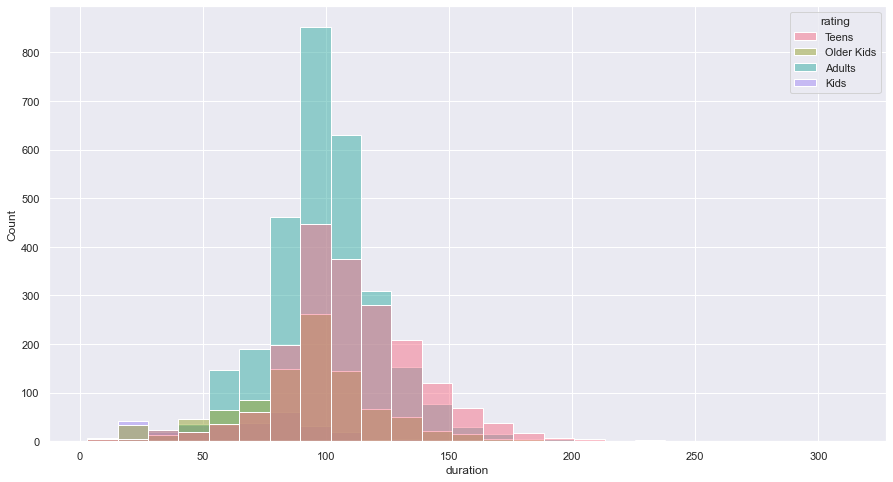

In [57]:
sns.histplot(data = netflix_movies, x = 'duration', hue = 'rating', bins = 25, palette = 'husl')

In [58]:
netflix_movies['duration'].describe()

count    6126.000000
mean       99.584884
std        28.283225
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

<AxesSubplot:xlabel='duration'>

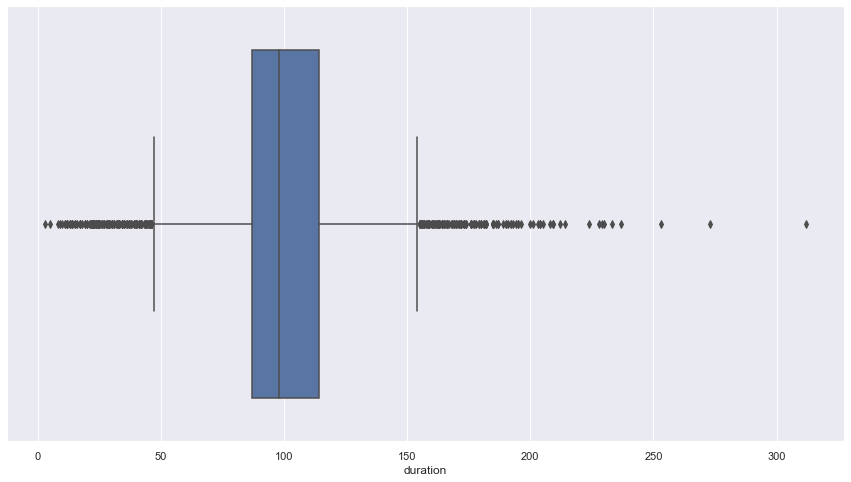

In [59]:
sns.boxplot(x = netflix_movies['duration'])

Finding outliers in netflix_movies['duration']

In [60]:
duration = sorted(netflix_movies['duration']) #sorting data

In [61]:
q1, q3= np.percentile(duration,[25,75]) #Finding first quartile and third quartile
print(q1, ' ', q3)

87.0   114.0


In [62]:
iqr = q3 - q1 #Find the IQR 
print(iqr)

27.0


In [63]:
#Find lower and upper bound, anything outside is an outlier
lower_bound = q1 -(1.5 * iqr) #lower bound
upper_bound = q3 +(1.5 * iqr) #upper bound
print(lower_bound, ' ', upper_bound)

46.5   154.5


Printing upper outliers

In [64]:
outliers_upper = []
for i in duration:
    if i > upper_bound:
        outliers_upper.append(i)

In [65]:
print(outliers_upper)

[155, 155, 155, 155, 155, 155, 155, 155, 155, 155, 156, 156, 156, 156, 156, 156, 156, 156, 156, 156, 157, 157, 157, 157, 157, 157, 158, 158, 158, 158, 158, 158, 158, 158, 158, 158, 158, 158, 159, 159, 159, 159, 159, 159, 160, 160, 160, 160, 160, 160, 161, 161, 161, 161, 161, 161, 161, 161, 161, 161, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 163, 164, 164, 164, 164, 165, 165, 165, 165, 165, 165, 165, 165, 166, 166, 166, 166, 166, 166, 166, 166, 167, 168, 168, 168, 168, 168, 168, 168, 169, 169, 170, 170, 170, 170, 170, 171, 171, 171, 171, 171, 171, 171, 172, 172, 172, 172, 173, 173, 173, 173, 173, 173, 174, 174, 176, 176, 176, 176, 176, 177, 177, 177, 177, 177, 178, 179, 179, 180, 180, 181, 181, 181, 181, 182, 182, 182, 185, 185, 185, 185, 185, 185, 186, 187, 187, 189, 190, 190, 191, 192, 192, 193, 194, 195, 195, 196, 200, 201, 203, 204, 204, 205, 208, 209, 209, 212, 214, 224, 228, 229, 230, 233, 237, 253, 273,

In [66]:
print(len(outliers_upper))

201


Printing lower outliers

In [67]:
outliers_lower = []
for i in duration:
    if i < lower_bound:
        outliers_lower.append(i)

In [68]:
print(outliers_lower)

[3, 5, 8, 9, 10, 11, 11, 12, 12, 12, 13, 13, 13, 14, 14, 14, 15, 15, 15, 16, 17, 17, 17, 18, 19, 19, 20, 20, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 34, 34, 34, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 37, 37, 38, 38, 38, 38, 38, 39, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42, 42, 42, 43, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46, 46]


In [69]:
print(len(outliers_lower))

248


### TV Show Seasons

In [74]:
netflix_tv_shows = netflix[netflix['Movie'] == False]

In [75]:
count_tv_shows = netflix_tv_shows['duration'].value_counts()

<AxesSubplot:>

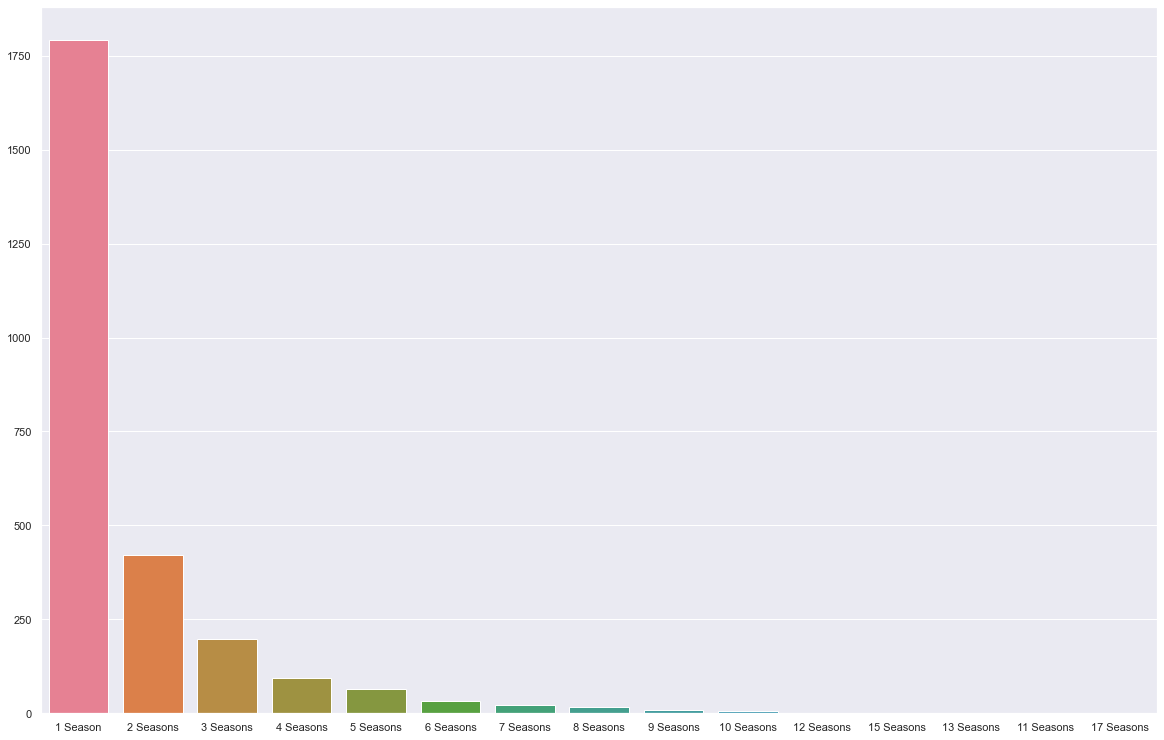

In [76]:
sns.set(rc = {'figure.figsize':(20,13)})

sns.barplot(x = count_tv_shows.index, 
            y = count_tv_shows.values, 
            palette = 'husl')